In [1]:
import bt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import io
#matplotlib.style.use('ggplot')
%matplotlib inline  

In [2]:
bloom = pd.read_csv("~/quantfinance/BLOOM.csv")
plc = pd.read_csv("~/quantfinance/PLC.csv")
bloom_d = bloom.set_index('Date')
plc_d = plc.set_index('Date')
bloom_d.head()
plc_d.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-02,0.340,0.340,0.340,0.340,1010000
2012-01-03,0.340,0.340,0.340,0.340,1340000
2012-01-04,0.340,0.345,0.340,0.345,1610000
2012-01-05,0.350,0.350,0.345,0.350,1110000
2012-01-06,0.355,0.360,0.355,0.355,3270000


In [3]:
#df = pd.concat({'BLOOM' : bloom_d['Close'], 'PLC' : plc_d['Close']})
df = pd.DataFrame(dict(BLOOM = bloom_d['Close'], PLC = plc_d['Close'])).dropna()
df.index = pd.to_datetime(df.index)
df.tail()

,BLOOM,PLC
2017-09-21,10.82,1.61
2017-09-22,10.50,1.61
2017-09-25,10.32,1.59
2017-09-26,10.80,1.60
2017-09-27,10.42,1.59


In [4]:
sma = df.rolling(50).mean()

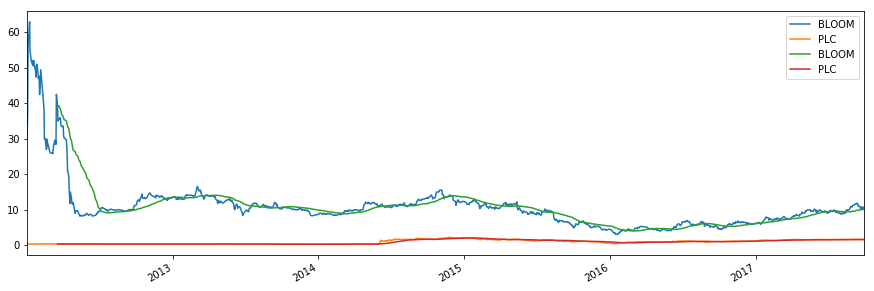

In [12]:
# let's see what the data looks like - this is by no means a pretty chart, but it does the job
plot = bt.merge(df, sma).plot(figsize=(15, 5))

In [27]:
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(df > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# Now we create the second Strategy
s2 = bt.Strategy('equal', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
# now we create the Backtest
t1 = bt.Backtest(s, df)
t2 = bt.Backtest(s2,df)

# and let's run it!
res = bt.run(t1,t2)
# run individually to compare wieghts
res1 = bt.run(t1)
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(df > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# Now we create the second Strategy
s2 = bt.Strategy('equal', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
# now we create the Backtest
t1 = bt.Backtest(s, df)
t2 = bt.Backtest(s2,df)

# and let's run it!
res = bt.run(t1,t2)
# run individually to compare wieghts
res1 = bt.run(t1)
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(df > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# Now we create the second Strategy
s2 = bt.Strategy('equal', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
# now we create the Backtest
t1 = bt.Backtest(s, df)
t2 = bt.Backtest(s2,df)

# and let's run it!
res = bt.run(t1,t2)
# run individually to compare wieghts
res1 = bt.run(t1)
res2 = bt.run(t2)

above50sma
0% [############################# ] 100% | ETA: 00:00:00equal
0% [############################# ] 100% | ETA: 00:00:00above50sma
0% [############################# ] 100% | ETA: 00:00:00equal
0% [############################# ] 100% | ETA: 00:00:00above50sma
0% [############################# ] 100% | ETA: 00:00:00equal
0% [############################# ] 100% | ETA: 00:00:00

Stat                 above50sma    equal
-------------------  ------------  ----------
Start                2012-01-01    2012-01-01
End                  2017-09-27    2017-09-27
Risk-free rate       0.00%         0.00%

Total Return         152.41%       72.29%
Daily Sharpe         0.65          0.45
Daily Sortino        1.03          0.77
CAGR                 17.51%        9.94%
Max Drawdown         -53.36%       -78.28%
Calmar Ratio         0.33          0.13

MTD                  -4.08%        -4.46%
3m                   -1.18%        8.75%
6m                   3.89%         23.26%
YTD                  27.81%        53.24%
1Y                   44.77%        91.34%
3Y (ann.)            6.70%         -1.49%
5Y (ann.)            23.04%        23.81%
10Y (ann.)           17.51%        9.94%
Since Incep. (ann.)  17.51%        9.94%

Daily Sharpe         0.65          0.45
Daily Sortino        1.03          0.77
Daily Mean (ann.)    24.93%        20.82%
Daily Vol (ann.)     38.54%       

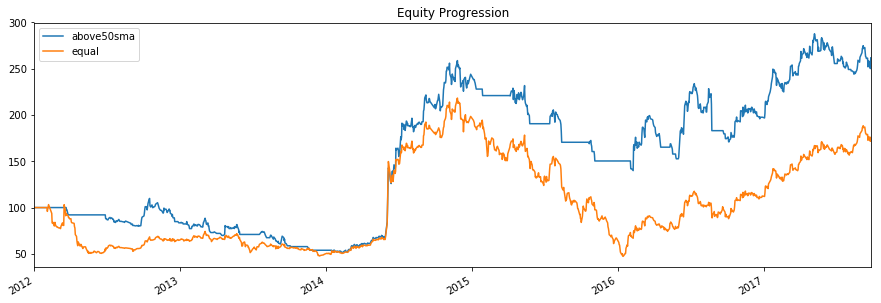

In [29]:
# what does the equity curve look like?
res.plot()
res.display()

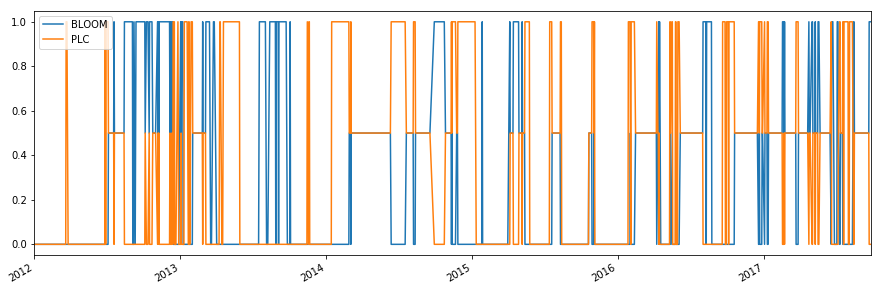

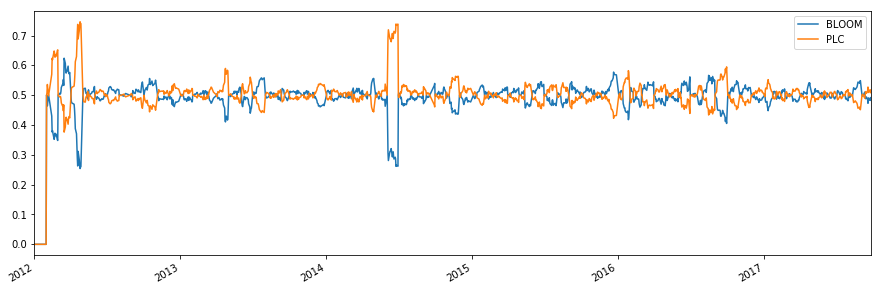

In [30]:
res1.plot_security_weights()
res2.plot_security_weights()

bt.backtest.Result